In [165]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [166]:
def function(x):
    return 1 / (x**2 + 1)


In [167]:
def lagrange(p_, i, x):
    p = 1
    for j in range(len(p_)):
        if j != i:
            p = p * (x - p_[j]) / (p_[i] - p_[j])
    return p

In [168]:
def interpolate(fun, points, x):
    sum = 0
    for i in range(len(points)):
        sum = sum + fun(points[i]) * lagrange(points, i, x)
    return sum

lagrange interpolation using uniformly distributed points

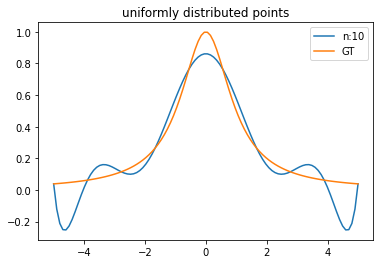

In [169]:
x = np.linspace(-5, 5, 100)

p = np.linspace(-5, 5, num=10)
y = interpolate(function, p, x)
plt.plot(x, y, label='n:10')

# p = np.linspace(-5, 5, num=20)
# y = interpolate(function, p, x)
# plt.plot(x, y, label='n:20')
#
# p = np.linspace(-5, 5, num=40)
# y = interpolate(function, p, x)
# plt.plot(x, y, label='n:40')

plt.plot(x, 1/ (x**2 + 1), label='GT')

plt.title("uniformly distributed points")
plt.legend()
#plt.yscale('symlog')
plt.show()

lagrange interpolation using chebyshev points

compute chebyshev points. These points are more densely distributed at the boundaries of our interval.

In [170]:
def chebyshev(n):
    c = np.zeros(n)
    for i in range(0,n):
        c[i] = 5*math.cos((i+0.5)*math.pi/n)
    return c

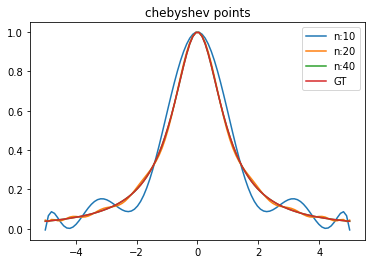

In [171]:
x = np.linspace(-5, 5, 100)

c = chebyshev(11)
y = interpolate(function, c, x)
plt.plot(x, y, label='n:10')

c = chebyshev(21)
y = interpolate(function, c, x)
plt.plot(x, y, label='n:20')

c = chebyshev(41)
y = interpolate(function, c, x)
plt.plot(x, y, label='n:40')

plt.plot(x, 1/ (x**2 + 1), label='GT')

plt.title("chebyshev points")
plt.legend()
plt.show()